# Project 2
### CS 5/7394 - Applied Machine Learning

- **Due** - March 11 @ 11:59 pm pushed to Github repo
- **Teams** - You can do this project solo or in pairs.  Not 3, not 4 not 5... Max of 2. If a 5394 student pairs with a 7394 student, the pair needs to do the 7394 work. 

Below are 6 Kaggle Datasets.  You will choose 1 to work with for this project. 

- [Airfare Prediction Dataset](https://www.kaggle.com/zwartfreak/airline-fare-prediction)
- [Chinese Rest Holiday Dataset](https://www.kaggle.com/holoong9291/chinese-rest-holiday-dataset-2020-to-2022)
- [Jigsaw Toxic Comment Classification Challenge](https://www.kaggle.com/julian3833/jigsaw-toxic-comment-classification-challenge?select=train.csv)
- [Latest Covid 19 Dataset Worldwide](https://www.kaggle.com/sandhyakrishnan02/latest-covid-19-dataset-worldwide)
- [Trains](https://www.kaggle.com/vahidehdashti/machinelearningdatabase-trains?select=trains-original.data)
- [Football Data top 5 Leagues](https://www.kaggle.com/sanjeetsinghnaik/football-data-top-5-leagues)

Merging disparate datasets is a staple of the data exploration process.  Therefore, for which ever data set above that you choose, you will need to independently find **an additional** dataset to merge with your selection.  The only requirement is that it add to the richness of the original dataset. Students in the 7000-level version of the class need to find two additional data sets to merge with the original selection. 

_Note_: If you want to start with a different data set, you need to get Fontenot's OK first.  

### Your Tasks

Below, there are cells that provide directions on what to do for the project.  

You can insert as many cells between the ones below as you'd like, but please **Do NOT** change the cells already provided. 

### Part 1 - Getting Started

- Import libraries
- Load original Data (which ever one you chose from the provided list) into a data frame. 
- Load your additional data set(s) into a data frame. 
- In a markdown cell, provide a brief description of your the data sets you've chosen to work with.  
- Develop a list of 3 - 4 questions that you hope to be able to answer after the exploration of the data and write them in this section. 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
covidRaw = pd.read_csv("archive/owid-covid-data.csv")
vaccineRaw = pd.read_csv("Manufacturers/country_vaccinations_by_manufacturer.csv")

### Original Dataset: Latest Covid 19 Dataset Worldwide
This dataset provides a summary of COVID-19 cases, vaccination rates, hospitalization rates, and more from Jan 28, 2020 to Jan 8, 2022. 
### Second Dataset: COVID-19 World Vaccinations By Manufacturer
This dataset is a record of the number of each type of COVID-19 vaccine that was administered each day in each country. 
### Questions to answer:
- Which countries had the highest total death rates the quickest?
- Which COVID-19 vaccine manufacturer is the most popular in the world?
- Did the popularity of the Johnson & Johnson vaccine decrease worldwide after negative side effects were reported?


### Part 2 - Data Inspection

Write some code to summarize the datasets.  Think about the following questions:
- What type of data is each variable? (think like a data scientist here, not a computer scientist)
- What is the total size of the data sets?
- What time boundaries are there in the dataset?  IOW, what time frame do they span?
- Are there any missing values in any of the variables? 

Do this with Intentionality.  Don't skimp. 

### Initial Dataset

In [2]:
covidRaw.info() #This line of code provides an excellent summary of the dataset. For the sake of this project, 
# most of the columns will not be necessary.
# There is a total of 153172 entries across 67 columns. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153172 entries, 0 to 153171
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    153172 non-null  object 
 1   continent                                   143944 non-null  object 
 2   location                                    153172 non-null  object 
 3   date                                        153172 non-null  object 
 4   total_cases                                 150522 non-null  float64
 5   new_cases                                   150431 non-null  float64
 6   new_cases_smoothed                          149280 non-null  float64
 7   total_deaths                                133279 non-null  float64
 8   new_deaths                                  133441 non-null  float64
 9   new_deaths_smoothed                         133309 non-null  float64
 

In [3]:
# For the sake of this project, most of the columns will not be necessary. 
# Rather than deleting each column I don't want one by one, I'll be making a new dataframe with the columns I do want:
covid = covidRaw[['date','iso_code', 'location', 'total_cases', 'new_cases', 'new_deaths','total_deaths','gdp_per_capita','total_tests','new_vaccinations', 'positive_rate','human_development_index','icu_patients', 'hosp_patients','new_tests','people_vaccinated','people_fully_vaccinated','population','total_vaccinations','aged_65_older']]

In [4]:
covid.head() #Here we can see that there are quite a few missing values. These don't really make sense to leave as NaN, 
# especially since they are numerical variables (you don't say that there are NaN total deaths when nobody dies, you say that there were 0 deaths).
# This is a problem we'll address quickly.

,date,iso_code,location,total_cases,new_cases,new_deaths,total_deaths,gdp_per_capita,total_tests,new_vaccinations,positive_rate,human_development_index,icu_patients,hosp_patients,new_tests,people_vaccinated,people_fully_vaccinated,population,total_vaccinations,aged_65_older
0,2020-02-24,AFG,Afghanistan,5.0,5.0,NaN,NaN,1803.987,NaN,NaN,NaN,0.511,NaN,NaN,NaN,NaN,NaN,39835428.0,NaN,2.581
1,2020-02-25,AFG,Afghanistan,5.0,0.0,NaN,NaN,1803.987,NaN,NaN,NaN,0.511,NaN,NaN,NaN,NaN,NaN,39835428.0,NaN,2.581
2,2020-02-26,AFG,Afghanistan,5.0,0.0,NaN,NaN,1803.987,NaN,NaN,NaN,0.511,NaN,NaN,NaN,NaN,NaN,39835428.0,NaN,2.581
3,2020-02-27,AFG,Afghanistan,5.0,0.0,NaN,NaN,1803.987,NaN,NaN,NaN,0.511,NaN,NaN,NaN,NaN,NaN,39835428.0,NaN,2.581
4,2020-02-28,AFG,Afghanistan,5.0,0.0,NaN,NaN,1803.987,NaN,NaN,NaN,0.511,NaN,NaN,NaN,NaN,NaN,39835428.0,NaN,2.581


In [5]:
covid = covid.fillna(0) #This is now a much cleaner dataset to work with, but there's still a lot of work to do.

In [6]:
covid.info() # This dataset now has 20 columns of 153172 instances, and there is no longer any missing data where numbers should be.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153172 entries, 0 to 153171
Data columns (total 20 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   date                     153172 non-null  object 
 1   iso_code                 153172 non-null  object 
 2   location                 153172 non-null  object 
 3   total_cases              153172 non-null  float64
 4   new_cases                153172 non-null  float64
 5   new_deaths               153172 non-null  float64
 6   total_deaths             153172 non-null  float64
 7   gdp_per_capita           153172 non-null  float64
 8   total_tests              153172 non-null  float64
 9   new_vaccinations         153172 non-null  float64
 10  positive_rate            153172 non-null  float64
 11  human_development_index  153172 non-null  float64
 12  icu_patients             153172 non-null  float64
 13  hosp_patients            153172 non-null  float64
 14  new_

In [7]:
covid.location.unique()

array(['Afghanistan', 'Africa', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Anguilla', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Asia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia', 'Bonaire Sint Eustatius and Saba',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'British Virgin Islands', 'Brunei', 'Bulgaria', 'Burkina Faso',
       'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde',
       'Cayman Islands', 'Central African Republic', 'Chad', 'Chile',
       'China', 'Colombia', 'Comoros', 'Congo', 'Cook Islands',
       'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Curacao',
       'Cyprus', 'Czechia', 'Democratic Republic of Congo', 'Denmark',
       'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Eswatini', 'Ethi

In [8]:
covid.date.head() # This dataset begins on Feb. 24th, 2020

0    2020-02-24
1    2020-02-25
2    2020-02-26
3    2020-02-27
4    2020-02-28
Name: date, dtype: object

In [9]:
covid.date.tail() # This is consistent with the dataset's description: "The dataset contains COVID 19 details till Jan 8 2022."

153167    2022-01-04
153168    2022-01-05
153169    2022-01-06
153170    2022-01-07
153171    2022-01-08
Name: date, dtype: object

In [10]:
covid.head() # Our data looks much better now.

,date,iso_code,location,total_cases,new_cases,new_deaths,total_deaths,gdp_per_capita,total_tests,new_vaccinations,positive_rate,human_development_index,icu_patients,hosp_patients,new_tests,people_vaccinated,people_fully_vaccinated,population,total_vaccinations,aged_65_older
0,2020-02-24,AFG,Afghanistan,5.0,5.0,0.0,0.0,1803.987,0.0,0.0,0.0,0.511,0.0,0.0,0.0,0.0,0.0,39835428.0,0.0,2.581
1,2020-02-25,AFG,Afghanistan,5.0,0.0,0.0,0.0,1803.987,0.0,0.0,0.0,0.511,0.0,0.0,0.0,0.0,0.0,39835428.0,0.0,2.581
2,2020-02-26,AFG,Afghanistan,5.0,0.0,0.0,0.0,1803.987,0.0,0.0,0.0,0.511,0.0,0.0,0.0,0.0,0.0,39835428.0,0.0,2.581
3,2020-02-27,AFG,Afghanistan,5.0,0.0,0.0,0.0,1803.987,0.0,0.0,0.0,0.511,0.0,0.0,0.0,0.0,0.0,39835428.0,0.0,2.581
4,2020-02-28,AFG,Afghanistan,5.0,0.0,0.0,0.0,1803.987,0.0,0.0,0.0,0.511,0.0,0.0,0.0,0.0,0.0,39835428.0,0.0,2.581


### Secondary dataset: vaccine data

In [11]:
vaccineRaw.info() #This is a much smaller dataset, but it luckily won't take as much effort to clean up. There are a total of 28833 entries in 4 columns.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28833 entries, 0 to 28832
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   location            28833 non-null  object
 1   date                28833 non-null  object
 2   vaccine             28833 non-null  object
 3   total_vaccinations  28833 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 901.2+ KB


In [12]:
vaccineRaw.head()

,location,date,vaccine,total_vaccinations
0,Austria,2021-01-08,Johnson&Johnson,0
1,Austria,2021-01-08,Moderna,0
2,Austria,2021-01-08,Oxford/AstraZeneca,0
3,Austria,2021-01-08,Pfizer/BioNTech,31632
4,Austria,2021-01-15,Johnson&Johnson,0


In [13]:
vaccineRaw.location.unique()

array(['Austria', 'Belgium', 'Bulgaria', 'Chile', 'Croatia', 'Cyprus',
       'Czechia', 'Denmark', 'Ecuador', 'Estonia', 'Finland', 'France',
       'Germany', 'Hong Kong', 'Hungary', 'Iceland', 'Ireland', 'Italy',
       'Japan', 'Latvia', 'Liechtenstein', 'Lithuania', 'Luxembourg',
       'Malta', 'Nepal', 'Netherlands', 'Norway', 'Peru', 'Poland',
       'Portugal', 'Romania', 'Slovakia', 'Slovenia', 'South Korea',
       'Spain', 'Sweden', 'Switzerland', 'Ukraine', 'United States',
       'Uruguay', 'European Union'], dtype=object)

In [14]:
# Ideally I want to switch the columns around to consolidate each day for each country (instead of having the same day in multiple rows for each type of the vaccine,
# I want each of the vaccines to have a column with their count for that day. 
vaccineRaw.vaccine.unique()

array(['Johnson&Johnson', 'Moderna', 'Oxford/AstraZeneca',
       'Pfizer/BioNTech', 'Sinovac', 'CanSino', 'Sputnik V',
       'Sinopharm/Beijing', 'Novavax'], dtype=object)

In [15]:
vaccineRaw.date.describe #This dataset spans Jan 8th, 2021 to Feb 24th, 2022. That's not the same time frame as our other dataset, but they share enough
# time that we should be able to get meaningful analysis from comparing the two.

<bound method NDFrame.describe of 0        2021-01-08
1        2021-01-08
2        2021-01-08
3        2021-01-08
4        2021-01-15
            ...    
28828    2022-02-24
28829    2022-02-24
28830    2022-02-24
28831    2022-02-24
28832    2022-02-24
Name: date, Length: 28833, dtype: object>

In [16]:
# I want to make each of these vaccine types into a column and make the corresponding 'total_vaccinations' the value.
vaccinePivot= vaccineRaw.pivot(index=['location','date'],columns='vaccine')['total_vaccinations'].reset_index() #Hooray!
# It took a while to figure out but now we have a presentable dataset that will be compatible with our other dataset


In [17]:
vaccineClean = vaccinePivot.fillna(0)  #Since we're counting the number of each vaccine that was administered, it's okay to have 0's instead of NaN

In [18]:
vaccineClean

vaccine,location,date,CanSino,Johnson&Johnson,Moderna,Novavax,Oxford/AstraZeneca,Pfizer/BioNTech,Sinopharm/Beijing,Sinovac,Sputnik V
0,Austria,2021-01-08,0.0,0.0,0.0,0.0,0.0,31632.0,0.0,0.0,0.0
1,Austria,2021-01-15,0.0,0.0,97.0,0.0,0.0,117119.0,0.0,0.0,0.0
2,Austria,2021-01-22,0.0,0.0,341.0,0.0,0.0,214939.0,0.0,0.0,0.0
3,Austria,2021-01-29,0.0,0.0,4340.0,0.0,0.0,260153.0,0.0,0.0,0.0
4,Austria,2021-02-05,0.0,0.0,6056.0,0.0,0.0,356696.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
7950,Uruguay,2022-02-20,0.0,0.0,0.0,0.0,89635.0,2325718.0,0.0,3247634.0,0.0
7951,Uruguay,2022-02-21,0.0,0.0,0.0,0.0,89635.0,2331112.0,0.0,3247635.0,0.0
7952,Uruguay,2022-02-22,0.0,0.0,0.0,0.0,89635.0,2334301.0,0.0,3247636.0,0.0
7953,Uruguay,2022-02-23,0.0,0.0,0.0,0.0,89635.0,2344042.0,0.0,3247636.0,0.0


In [19]:
vaccineClean = vaccineClean.rename(columns={"Johnson&Johnson":"JJ", "Oxford/AstraZeneca": "Oxford_AstraZeneca", "Pfizer/BioNTech":"Pfizer_BioNTech", "Sinopharm/Beijing":"Sinopharm_Beijing", "Sputnik V":"Sputnik_V"}) #The original label for Johnson & Johnson was Johnson&Johnson, which doesn't work very well in data analysis due to the ampersand. 
# Here I've renamed the column to JJ
# Additionally, a few other columns have the same issue. I've gone ahead and just added underscores instead of special characters or spaces.

*We now have both of our datasets in a position where we could merge them.*

### Part 3 - Data Description

- Create a data description (data dictionary) for your data sets.
    - Describe each variable
    - If categorical, what levels are present? If the levels are encoded, what do the codes mean?
    - If numeric, provide min, max, median and any other univariate stats you'd like to add in. 
- Where appropriate, provide histograms or other visualizations to characterize each variable. 

# Initial Dataset: 
Categorical:
- date: the date of the observation (different day for each day in the span of the dataset (from Jan 8 2021 - Jan 8 2022)
- iso_code: 3 letter country code
- location: country name 

Numeric:
- total_cases: the total confirmed cases of COVID-19 (cumulative) (min: 0, max: 3.051916e+08, mean: 2.103392e+06)
- new_cases: new confirmed cases of COVID-19 (min: 0, max: 2.879121e+06, mean: 8.362585e+03)
- new_deaths: new deaths attributed to COVID-19 (min: 0, max: 18062, mean: 148.549102)
- total_deaths: total deaths attributed to COVID-19 (min: 0, max: 5.484782e+06, mean: 4.599508e+04)
- gdp_per_capita: GDP at purchasing power parity (constant 2011 international dollars), from the most recent year available (min: 0, max: 116935.60, mean: 16404.527025)
- human_development_index: composite index measuring average achievement in 3 basic dimensions of human development (long healthy life, knowledge, standard of living) (min: 0, max: 0.957, mean:  0.595734)
- icu_patients: number of COVID-19 patients in intensive care units on a given day (min: 0, max: 28891, mean: 118.789596)
- hosp_patients: number of COVID-19 patients in the hospital on a given day (min: 0, max: 133268, 559.981805)
- new_tests: new tests for COVID-19 (min: 0, max: 3.740296e+06, mean: 2.443949e+04)
- people_vaccinated: total number of people who received at least one vaccine dose (cumulative) (min: 0, max: 4.655633e+09, mean: 1.823795e+07)
- people_fully_vaccinated: total number of people who received all doses prescribed (cumulative) (min: 0, max: .934990e+09, mean: 1.256051e+07)
- population: latest available value of population (min: 1.002197e+06, max: 7.874966e+09, mean: 1.474617e+08)
- total_vaccinations: total number of COVID-19 vaccination doses administered (cumulative) (min: 0, max: 9.421129e+09, mean: 3.611898e+07)
- aged_65_older: % share of the population that is 65+ according to the most recent info (min: 0, max: 27.049000, 7.208174)

# Secondary Dataset: (omitting data that will be overlapped in merge: location, date)
Numerical: 
- CanSino: total # of vaccinations that day (min: 0, max: 574208, mean: 25312.205531)
- JJ: (Johnson&Johnson) total # of vaccination doses administered that day for this particular vaccine (min: 0, max: 1.850264e+07, mean: 1.352508e+06)
- Moderna: total # of vaccination doses administered that day for this particular vaccine (min: 0, max: 2.079438e+08, mean: 1.083511e+07)
- Novavax: total # of vaccination doses administered that day for this particular vaccine (min: 0, max: 52306, mean: 41.710371)
- Oxford_AstraZeneca: total # of vaccination doses administered that day for this particular vaccine (min: 0, max: 6.739285e+07, mean: 4.605971e+06)
- Pfizer_BioNTech: total # of vaccination doses administered that day for this particular vaccine (min: 0, max: 5.924887e+08, mean: 3.712610e+07)
- Sinopharm_Beijing: total # of vaccination doses administered that day for this particular vaccine (min: 0, max: 1.996166e+07, mean: 4.884539e+05)
- Sinovac: total # of vaccination doses administered that day for this particular vaccine (min: 0, max: 2.537591e+07, mean: 1.557454e+06)
- Sputnik_V: total # of vaccination doses administered that day for this particular vaccine (min: 0, max: 1.845103e+06, mean: 7.973871e+04)


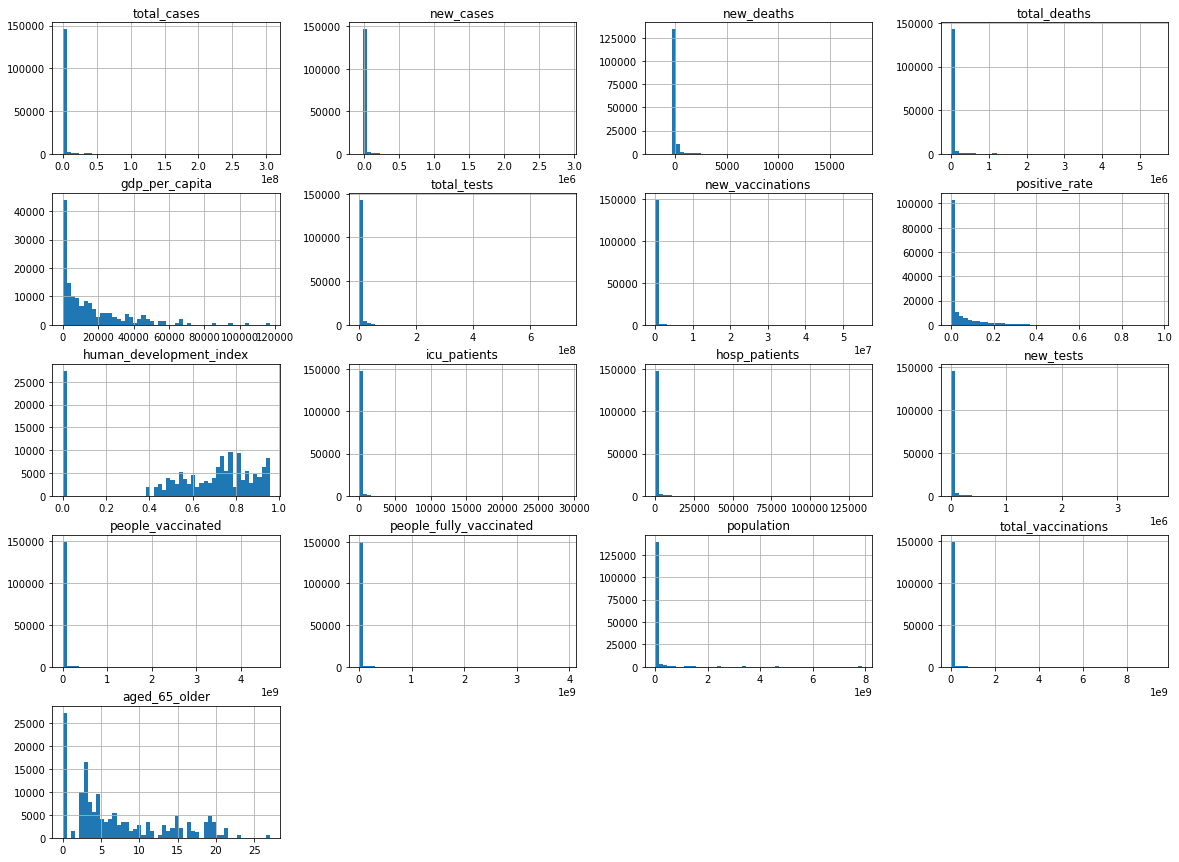

In [20]:
import matplotlib.pyplot as plt
covid.hist(bins=50, figsize=(20,15));

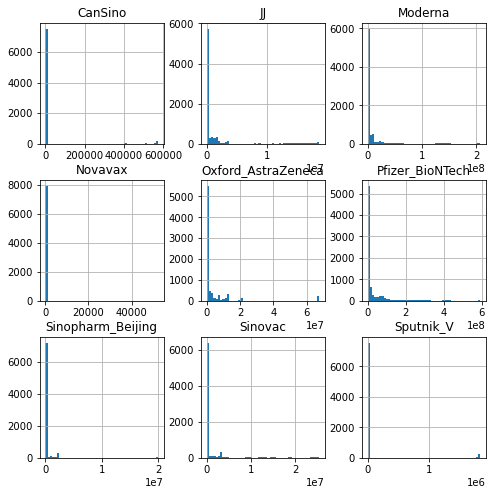

In [21]:
vaccineClean.hist(bins=50, figsize=(8,8)); # All of the plots have a significant number of 0s-- that makes a lot of sense, especially since 
# the vaccines weren't available everywhere at first.

### Part 4 - Merge the data

Now that you have a better feel for each of your two (or three, for the 7394 students) data sets, it is time to merge them. Describe your strategy for merging the data sets and then actually perform the merge.  

Develop a strategy for verifying that the data is properly merged (hoping and finger-crossing are not valid strategies). 

In [22]:
#I've already cleaned up the data and specifically formatted it. This was strategic-- everything I did was with this merge in mind. I'll merge 
#the vaccineClean dataset with the original dataset on location and date, so that we can view each individual type of vaccine per day per country.
merged = covid.merge(vaccineClean, on=['location','date'])
merged.location.unique() #This shows that we merged the locations correctly: we only wanted the countries that were in both datasets to be represented in the merged dataset
# The first dataset has many more countries, so the second dataset was the limiter

array(['Austria', 'Belgium', 'Bulgaria', 'Chile', 'Croatia', 'Cyprus',
       'Czechia', 'Denmark', 'Ecuador', 'Estonia', 'European Union',
       'Finland', 'France', 'Germany', 'Hong Kong', 'Hungary', 'Iceland',
       'Ireland', 'Italy', 'Japan', 'Latvia', 'Liechtenstein',
       'Lithuania', 'Luxembourg', 'Malta', 'Netherlands', 'Norway',
       'Peru', 'Poland', 'Portugal', 'Romania', 'Slovakia', 'Slovenia',
       'South Korea', 'Spain', 'Sweden', 'Switzerland', 'Ukraine',
       'United States', 'Uruguay'], dtype=object)

In [23]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7063 entries, 0 to 7062
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   date                     7063 non-null   object 
 1   iso_code                 7063 non-null   object 
 2   location                 7063 non-null   object 
 3   total_cases              7063 non-null   float64
 4   new_cases                7063 non-null   float64
 5   new_deaths               7063 non-null   float64
 6   total_deaths             7063 non-null   float64
 7   gdp_per_capita           7063 non-null   float64
 8   total_tests              7063 non-null   float64
 9   new_vaccinations         7063 non-null   float64
 10  positive_rate            7063 non-null   float64
 11  human_development_index  7063 non-null   float64
 12  icu_patients             7063 non-null   float64
 13  hosp_patients            7063 non-null   float64
 14  new_tests               

In [24]:
merged.date.describe # This makes sense and shows that we merged the dates correctly. The only time period the two datasets share is from 1/8/21-1/8/22
# and that is the time spanned in our new merged set

<bound method NDFrame.describe of 0       2021-01-08
1       2021-01-15
2       2021-01-22
3       2021-01-29
4       2021-02-05
           ...    
7058    2022-01-04
7059    2022-01-05
7060    2022-01-06
7061    2022-01-07
7062    2022-01-08
Name: date, Length: 7063, dtype: object>

In [25]:
merged.Moderna.describe()

count    7.063000e+03
mean     9.232086e+06
std      2.887680e+07
min      0.000000e+00
25%      0.000000e+00
50%      2.445330e+05
75%      2.894582e+06
max      1.974213e+08
Name: Moderna, dtype: float64

In [26]:
pd.to_datetime(merged['date'])
merged['month'] = pd.DatetimeIndex(merged['date']).month
merged.head()

,date,iso_code,location,total_cases,new_cases,new_deaths,total_deaths,gdp_per_capita,total_tests,new_vaccinations,...,CanSino,JJ,Moderna,Novavax,Oxford_AstraZeneca,Pfizer_BioNTech,Sinopharm_Beijing,Sinovac,Sputnik_V,month
0,2021-01-08,AUT,Austria,376793.0,2063.0,73.0,6641.0,45436.686,3871527.0,13285.0,...,0.0,0.0,0.0,0.0,0.0,31632.0,0.0,0.0,0.0,1
1,2021-01-15,AUT,Austria,390788.0,1528.0,66.0,6987.0,45436.686,7459608.0,18639.0,...,0.0,0.0,97.0,0.0,0.0,117119.0,0.0,0.0,0.0,1
2,2021-01-22,AUT,Austria,401886.0,2088.0,42.0,7330.0,45436.686,8593891.0,11668.0,...,0.0,0.0,341.0,0.0,0.0,214939.0,0.0,0.0,0.0,1
3,2021-01-29,AUT,Austria,411730.0,1500.0,51.0,7658.0,45436.686,9160616.0,15270.0,...,0.0,0.0,4340.0,0.0,0.0,260153.0,0.0,0.0,0.0,1
4,2021-02-05,AUT,Austria,421189.0,1388.0,37.0,7973.0,45436.686,9940634.0,21546.0,...,0.0,0.0,6056.0,0.0,0.0,356696.0,0.0,0.0,0.0,2


In [27]:
merged[(merged['date']=="2021-01-08") & (merged['location']=="Austria")]
# Here I just wanted to make sure that the data was consistent with the separate datasets. The data appears to be consistent, so that's promising! 

,date,iso_code,location,total_cases,new_cases,new_deaths,total_deaths,gdp_per_capita,total_tests,new_vaccinations,...,CanSino,JJ,Moderna,Novavax,Oxford_AstraZeneca,Pfizer_BioNTech,Sinopharm_Beijing,Sinovac,Sputnik_V,month
0,2021-01-08,AUT,Austria,376793.0,2063.0,73.0,6641.0,45436.686,3871527.0,13285.0,...,0.0,0.0,0.0,0.0,0.0,31632.0,0.0,0.0,0.0,1


In [28]:
covid[(covid['date']=="2021-01-08") & (covid['location']=="Austria")]

,date,iso_code,location,total_cases,new_cases,new_deaths,total_deaths,gdp_per_capita,total_tests,new_vaccinations,positive_rate,human_development_index,icu_patients,hosp_patients,new_tests,people_vaccinated,people_fully_vaccinated,population,total_vaccinations,aged_65_older
9241,2021-01-08,AUT,Austria,376793.0,2063.0,73.0,6641.0,45436.686,3871527.0,13285.0,0.0,0.922,371.0,2000.0,23605.0,24699.0,0.0,9043072.0,24699.0,19.202


In [29]:
vaccineClean[(vaccineClean['date']=="2021-01-08")& (vaccineClean['location']=="Austria")]

vaccine,location,date,CanSino,JJ,Moderna,Novavax,Oxford_AstraZeneca,Pfizer_BioNTech,Sinopharm_Beijing,Sinovac,Sputnik_V
0,Austria,2021-01-08,0.0,0.0,0.0,0.0,0.0,31632.0,0.0,0.0,0.0


### Part 5 - Explore Bivariate relationships

- Choose a reasoned set of variables to explore further.  You don't have to explore all possible pairs of variables, nor do we want to grade that much.  Choose 7 - 9 variables. One should be a variable that you'd like to predict (target variable) using the others (predictor variables). 
- List your predictor variables
- List your target variable
- Briefly describe why you have chosen these. 

Use any of the available visualizations from Seaborn to explore the relationships between the variables. Explore the relationships among the predictor variables as well as the relationship between each predictor variable and the target variable.  Which of the predictor variables are most strongly related?  Are there any interesting relationships between categorical predictors and numeric predictors?  If there are any dichotomous variables, does that influence any of the relationships? Are the relationships positive or negative? 

Below each plot, you should provide a description and interpretation of the plot.  Make sure to include why the variables in that plot were chosen and what you hope the reader would gain from it as well. 

## Chosen Variables: 
- date (predictor)
- month (predictor)
- location (predictor)
- new_cases (predictor)
- total_cases (predictor)
- population (predictor)
- total_deaths (predictor)
- total_vaccinations (predictor)
- Moderna (can be predictor or target depending on question)
- JJ (can be predictor or target depending on question)
- Pfizer_BioNTech (can be predictor or target depending on question)
My goal with choosing these two datasets was to draw conclusions about the number of each type of vaccine administered through the 
dataset's time frame. I chose to focus on the Johnson and Johnson, Moderna and Pfizer/BioNTech vaccines. Since we're not building a model right now, it's also safe to use each of the vaccines as predictors for the other vaccine types. 

<br> None of my variables are dichotomous. However, there were some still unexpected relationships between variables.


<AxesSubplot:>

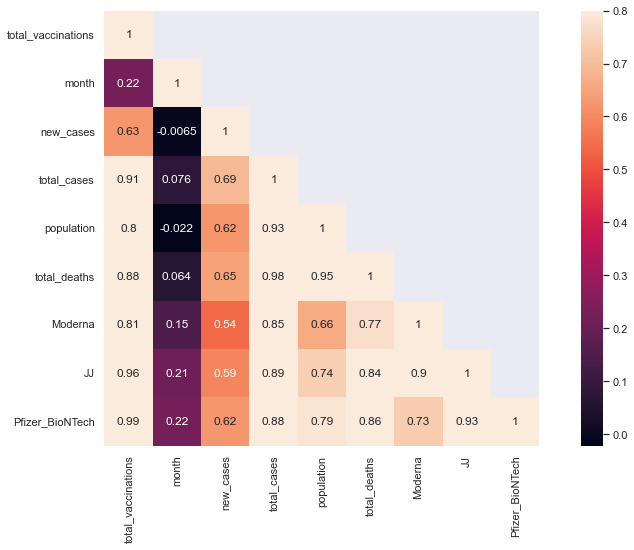

In [30]:
import seaborn as sn
corrMatt = merged[["total_vaccinations","location","month",
                    "new_cases","total_cases",
                    "population","total_deaths", "Moderna", "JJ", "Pfizer_BioNTech"]].corr()
mask = np.array(corrMatt)
mask[np.tril_indices_from(mask)] = False
sn.set(rc = {'figure.figsize':(15,8)})
sn.heatmap(corrMatt, mask=mask,
           vmax=.8, square=True,annot=True)

This graph shows the correlations between every possible pair of variables (except for the location variable, which is categorical and would not be comparable to the other variables). As you can see, there are quite a few positive correlations and very few negative. Most of the correlations are fairly strong, in fact, with the majority being over 0.5. I was surprised to see that there were such high correlation values between the vaccine types. However, I want to know more about each country. Let's explore Ukraine's experience with COVID-19.

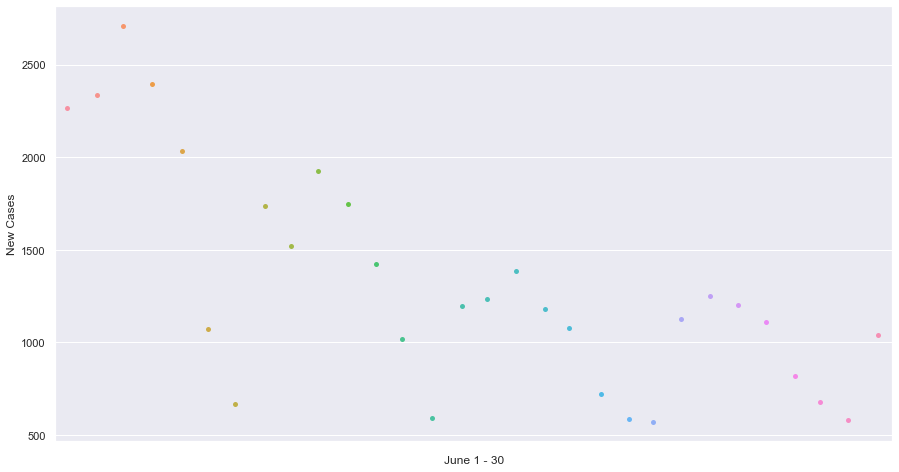

In [110]:
#Let's see what Ukraine's June 2021 looked like. 
ukraineDf = merged[(merged['location']=="Ukraine") & (merged['month']==6)]
graph = sns.stripplot(x='date', y ='new_cases', data=ukraineDf, alpha=0.9)
graph.set(xticklabels=[]);
graph.set(xlabel="June 1 - 30");
graph.set(ylabel="New Cases");

Interesting. As June went on, the number of new cases tended to go down, then would spike up again. This happened over what looks like weekly intervals. However, as the month went on, the number of new cases declined. Now let's see if that correlates at all with vaccination rates. 

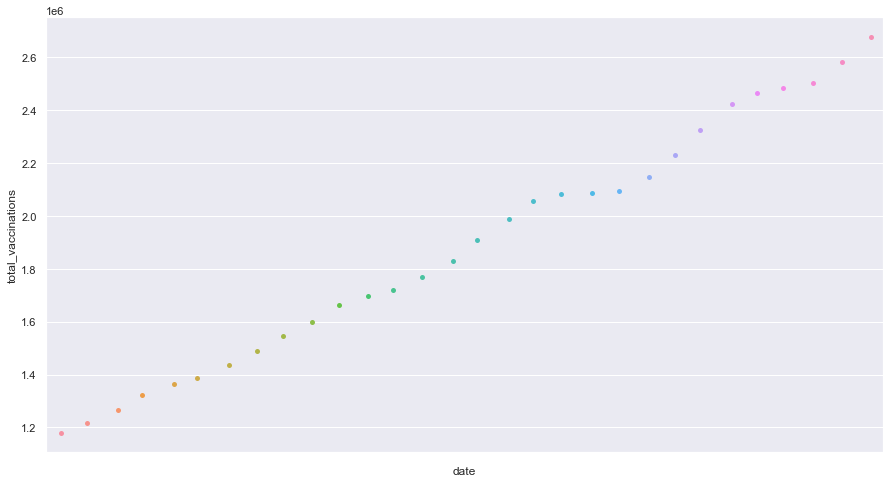

In [112]:
graph = sns.stripplot(x='date', y ='total_vaccinations', data=ukraineDf, alpha=0.9)
graph.set(xticklabels=[]);

Cool! It looks like the number of total vaccinations administered in Ukraine consistently rose throughout the month of June. This trend makes sense with the downward slope of the number of new cases.

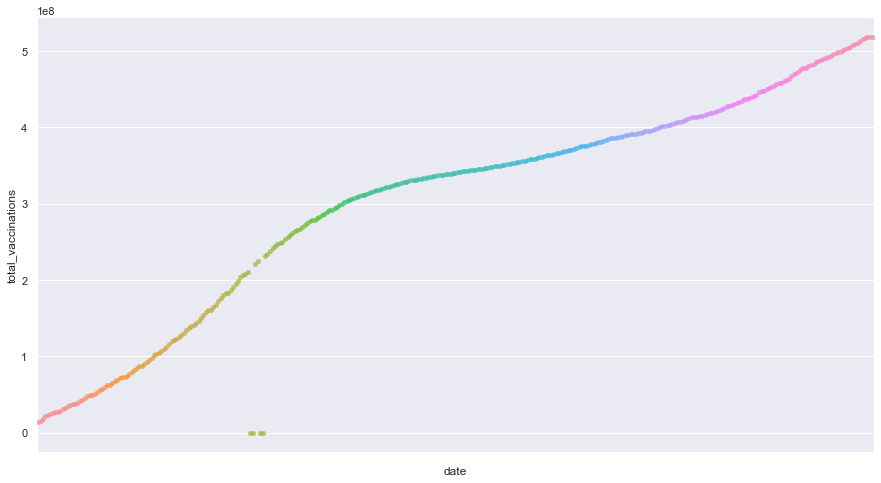

In [114]:
# I want to try the same thing with the US, except for the entire year.
usDf= merged[["date","total_vaccinations","location","month",
                    "new_cases","total_cases",
                    "population","total_deaths", "Moderna", "JJ", "Pfizer_BioNTech"]]
usDf = usDf[(usDf['location']=="United States")]
graph = sns.stripplot(x='date', y ='total_vaccinations', data=usDf, alpha=0.7)
graph.set(xticklabels=[]);

This is great. Over the entire time span of the dataset, the US has a fairly steady upward trend of vaccinations. Let's see if there was a favorite. 

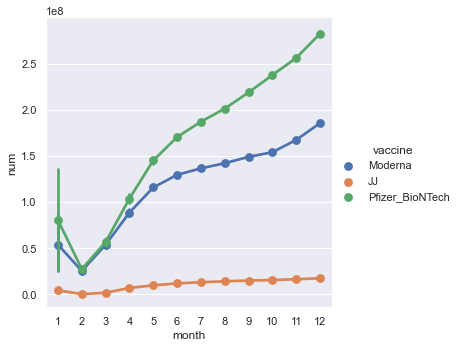

In [104]:
#Here I'm creating a dataset to use for the plot that will allow me to separate the values for Moderna, Pfizer and JJ
usDfMelt = usDf.melt(id_vars=["date","total_vaccinations","location","month",
                    "new_cases","total_cases",
                    "population","total_deaths"], var_name='vaccine', value_name='num')
sns.catplot(x='month', y='num', hue = 'vaccine', data=usDfMelt, kind='point')

It appears that Pfizer/BioNTech was the most popular vaccine in the US during 2021, followed by Moderna. Overall, the number of vaccinations for each different type was an upward trend (except for JJ, which appears slightly flat).

<AxesSubplot:xlabel='month', ylabel='num'>

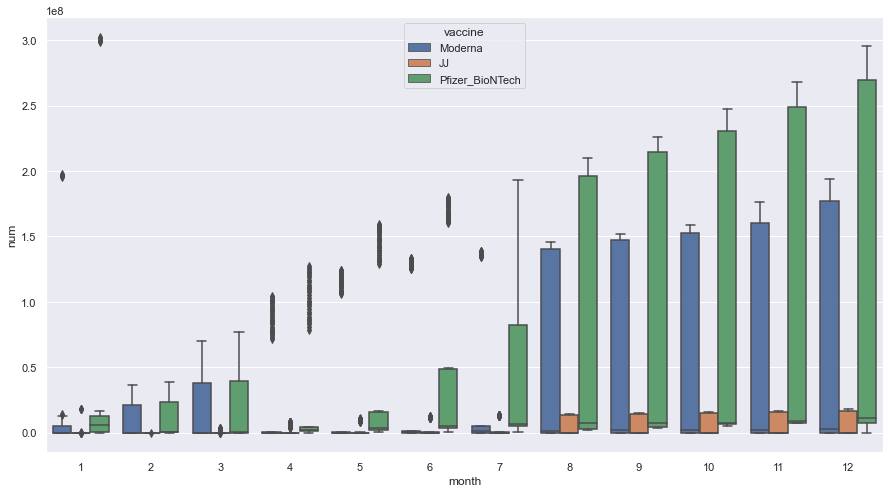

In [137]:
#I liked the last visualization so much that I decided to do it again, but for a few countries this time. 
mergedMelt= merged[["date","total_vaccinations","location","month",
                    "new_cases","total_cases",
                    "population","total_deaths", "Moderna", "JJ", "Pfizer_BioNTech"]]
mergedMelt = mergedMelt[(mergedMelt['location']=="United States") |(merged['location']=="Japan")|(merged['location']=="Austria")|(merged['location']=="Chile")|(merged['location']=="Ukraine")] 
mergedMelt = mergedMelt.melt(id_vars=["date","total_vaccinations","location","month",
                    "new_cases","total_cases",
                    "population","total_deaths"], var_name='vaccine', value_name='num')
sns.boxplot(x='month', y='num', hue = 'vaccine',data=mergedMelt)

From this visualization it appears that Pfizer was still the most popular in the countries I included, and that the trend of increased numbers of vaccines being administered as the year went on wasn't exclusive to the US.

Text(0, 0.5, 'Number of administered Moderna vaccines')

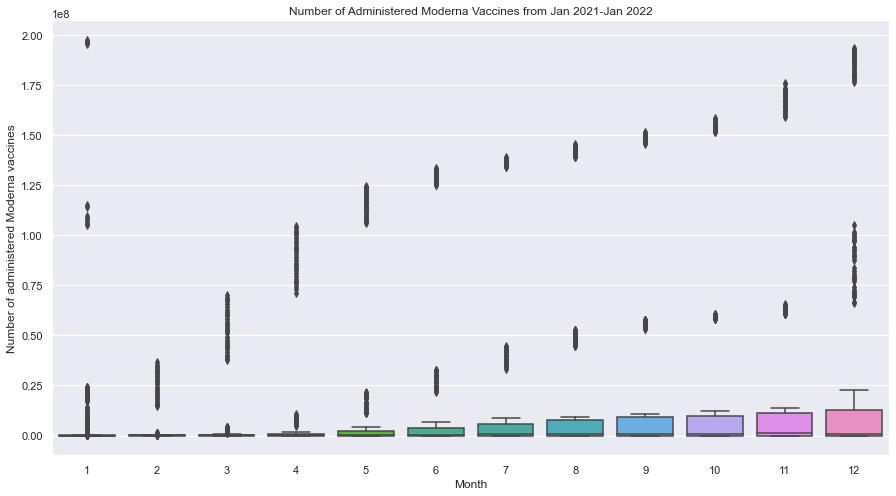

In [36]:
boxPlot2 = sn.boxplot(data=merged[['month',
                         'Moderna']],
              x="month",y="Moderna").set(title="Number of Administered Moderna Vaccines from Jan 2021-Jan 2022")
plt.xlabel("Month")
plt.ylabel("Number of administered Moderna vaccines")

Here we can see how many Moderna vaccines were administered in the world from January 2021 to January 2022. It appears that the number of Moderna vaccines administered had an upward trend.

In [115]:
import matplotlib.pyplot as plt

<AxesSubplot:xlabel='month', ylabel='new_cases'>

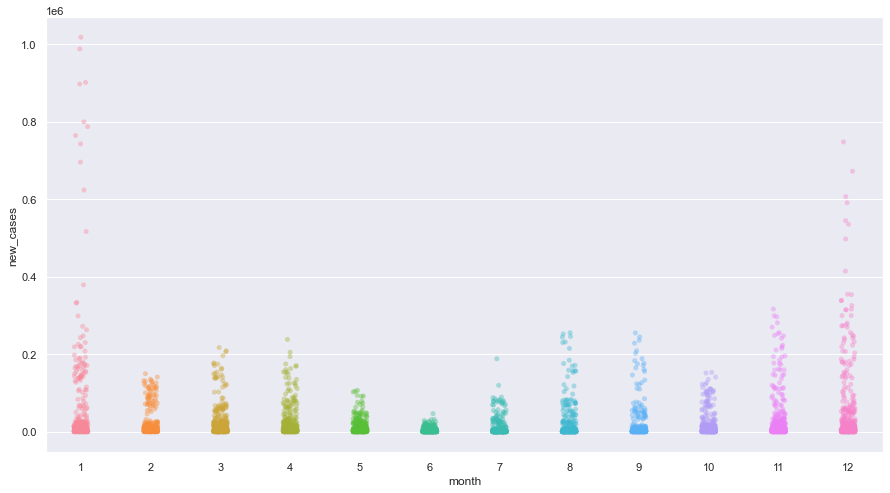

In [43]:
sns.stripplot(x='month', y='new_cases', data=merged, alpha=0.4)

This data makes a lot of sense-- as the year went on, more people in different countries were exposed to COVID-19 and its different variants. 


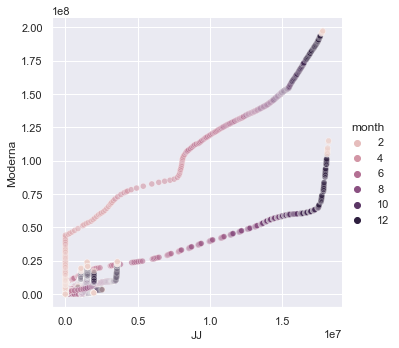

In [119]:
sns.relplot(x='JJ', y='Moderna', data=merged,alpha=0.6, hue="month")

This graph shows an interesting trend-- at the beginning of the year, Moderna was much more popular than JJ. However, it seems like JJ gained popularity as the year went on (most of the darkest hues are in JJ's higher value region).